In [98]:
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from crtbp_prop import propNRevsPlanes
from lagrange_pts import lagrange_pts
import copy
from IPython.display import clear_output
%matplotlib inline

In [2]:
# Постоянные
Sm = 1.98847e30  #Масса Солнца
Em = 5.9722e24  # Масса Земли
ER = 1.496e8  # Расстояние между Землей и Солнцем
T = 365*24*60*60  # Период обращения Земли вокруг Солнца

# Безразмерная система
mu1 = Sm/(Sm + Em)  # масса Солнца
v0kms = 0.1
vcoef = T/(2*np.pi*ER) # Коэффициент скорости
earth = np.array([mu1,0,0]) # Координаты Земли
sun = np.array([mu1-1.,0,0,])
L = lagrange_pts(mu1) # Координаты точек Либрации
L1 = L[0,0]

In [12]:
def ShowTraj(arr,traj_span, bound = None):
    plt.figure(figsize=(15,15))
    for i in range(*traj_span): 
        plt.plot(arr[i]['arr'][:,0],arr[i]['arr'][:,1])
    plt.legend(np.arange(*traj_span))
    plt.plot(L[0,0],L[0,2],'kx',markersize=9)
    plt.plot(earth[0],earth[2],'ko')
    if bound:
        plt.axvline(bound[1],c='k')
        plt.axvline(bound[0],c='k')

In [3]:
def s0(x,z,v):
     return np.array([x, 0., z, 0, v*vcoef, 0])

In [119]:
def PropLineGreedy(start,step,level,planes, stop_type = 'vel', precise = True):
    stp = np.arange(start,start-100*step,-step)
    stp = np.array(list(zip(stp,np.full_like(stp,level))))
    arr = []
    arr_inner = []
    for i, p in enumerate(stp):
        print(i)
        clear_output(wait=True)
        traject  = propNRevsPlanes(mu1,s0(*p,v0kms),0,planes,50,retDV=True)
        stop_vel = True not in (np.abs(traject['DV'][:,0]) > 1e-3)
        stop_conv = traject['conv']
        stop = {'vel': stop_vel, 'conv': stop_conv}
        if stop[stop_type]:
            traject['start_point'] = p
            arr.append(traject)
        elif precise:
            #import pdb; pdb.set_trace()
            arr_inner = PropLineGreedy(p[0]+step,step/10,level,planes,stop_type='vel',precise=False)
            arr.extend(arr_inner)
            return arr
        else:
            return arr

In [114]:
step = 1e4/ER
xl_def = L1 -(earth[0]-L1)
xr_def = earth[0]-1e4/ER
planes = [xl_def,xr_def,1]

In [115]:
time_start = time.time()
arr1 = PropLineGreedy(L1-step,step,0.0,planes)
time_top = time.time()

2


In [116]:
len(arr1)

57

In [103]:
#pickle.dump(arr1, open('log/{}.bin'.format(0),'wb'))

In [ ]:
for i, lv in enumerate(np.arange(0.0, 100*step, step)):
    arr1 = PropLineGreedy(L1-step,step,lv,planes)
    pickle.dump(arr1, open('log/{}.bin'.format(i),'wb'))

In [112]:
1e-2/vcoef

0.2980607946328216

In [109]:
arr1[-1]['DV']

array([[ 1.39459083e-18,  2.27753967e-02],
       [ 1.06559783e-09,  0.00000000e+00],
       [ 1.13147172e-09,  0.00000000e+00],
       [-1.53598645e-10, -0.00000000e+00],
       [ 2.11056141e-09,  0.00000000e+00],
       [ 1.14120580e-09,  0.00000000e+00],
       [ 7.42555439e-10,  0.00000000e+00],
       [-2.73421286e-11, -0.00000000e+00],
       [ 7.84708298e-11,  0.00000000e+00],
       [ 1.38314489e-09,  0.00000000e+00],
       [ 1.40893208e-09,  0.00000000e+00],
       [ 5.57682345e-10,  0.00000000e+00],
       [-1.99824142e-08, -0.00000000e+00],
       [ 1.24406805e-09,  0.00000000e+00],
       [ 2.30023565e-09,  0.00000000e+00],
       [ 1.58368616e-09,  0.00000000e+00],
       [ 2.71759593e-10,  0.00000000e+00],
       [-8.34015976e-04, -0.00000000e+00],
       [ 1.24251249e-09,  0.00000000e+00],
       [ 2.89339921e-09,  0.00000000e+00],
       [ 2.14494529e-09,  0.00000000e+00],
       [ 2.76731793e-10,  0.00000000e+00],
       [-4.67737227e-10, -0.00000000e+00],
       [-1.

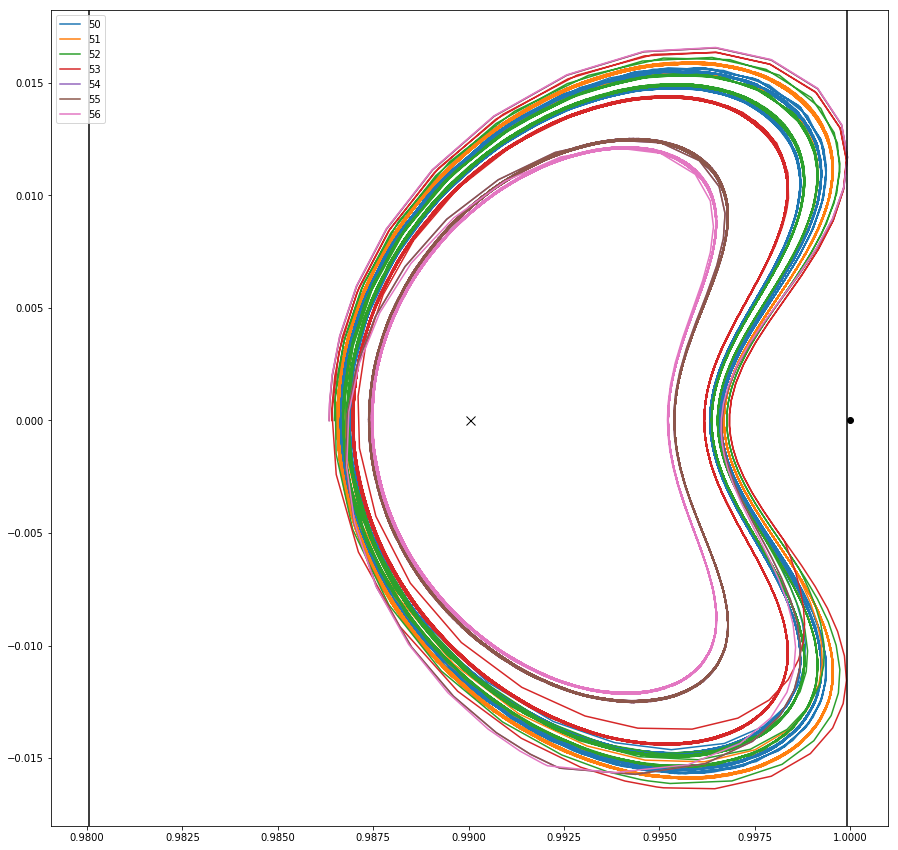

In [118]:
ShowTraj(arr1,[50,57],bound=[L1 -(earth[0]-L1),earth[0]-1e4/ER])